In [1]:
import numpy as np
import healpy as hp
import os
import matplotlib.pyplot as plt
from astropy import wcs
import astropy.coordinates as coord
import astropy.units as u
%matplotlib inline
import matplotlib
from astropy.io import fits
from astropy.cosmology import Planck15 as cosmo, z_at_value

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

In [2]:
mode = 'reduced'

In [11]:
rarange  = [0,10]
decrange = [-6,4]
chirange = [1632,1832]
dlow = chirange[0]
dhigh = chirange[1]

In [12]:
def lim(ra, dec, z, rarange, decrange, chirange, lam=False, lamdas=None):
    in_box = (ra>rarange[0]) & (ra < rarange[1]) & (dec>decrange[0]) & (dec < decrange[1])
    zmin = z_at_value(cosmo.comoving_distance, chirange[0]*u.Mpc)
    zmax = z_at_value(cosmo.comoving_distance, chirange[1]*u.Mpc)
    inz  = (z > zmin) & (z < zmax)
    ra     = ra[in_box & inz]
    dec    = dec[in_box & inz]
    if lam:
        return ra, dec, lamdas[in_box & inz]
    else:
        return ra,dec
def get_fullinfo(file):
    info = np.loadtxt(file)
    richness = info[:,0]; z = info[:,1]; ra = info[:,2]; dec = info[:,3]
    return richness, z, ra, dec
def xyz_to_ra_dec(x,y,z):
    theta, phi = hp.vec2ang(np.column_stack((x,y,z)))
    ra = phi * 180. / np.pi
    dec = 90 - theta * 180 / np.pi
    return ra,dec
def get_theta_phi(file):
    thetaphi = np.loadtxt(file)
    theta = thetaphi[:,0]
    phi   = thetaphi[:,1]
    return theta,phi
def theta_phi_to_ra_dec(theta,phi):
    ra = phi * 180. / np.pi
    dec = 90 - theta * 180 / np.pi
    return ra, dec

## Real Data, full catalogs

In [13]:
# cl_hdu = fits.open("/mnt/scratch-lustre/mlokken/data/cluster_cats/large_region_y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt5_vl02_catalog.fit")
# cls    = cl_hdu[1].data
# cl_lambda = cls['LAMBDA_CHISQ']
# cls    = cls[cl_lambda > 7]
# cl_ra  = cls['RA']
# cl_dec = cls['dec']
# cl_z   = cls['Z_LAMBDA']
# cl_lam = cls['LAMBDA_CHISQ']
# cl_hdu.close()

# rm_hdu = fits.open("/mnt/scratch-lustre/mlokken/data/redmagic/large_region_y3_gold_2.2.1_wide_sofcol+deep_mof_run_redmagic_highdens.fit")
# rm     = rm_hdu[1].data
# rm_ra  = rm['RA']
# rm_dec = rm['dec']
# rm_z   = rm['zredmagic']
# rm_hdu.close()

# cm_hdu = fits.open("/mnt/scratch-lustre/mlokken/data/boss_galaxies/large_region_galaxy_DR12v5_CMASS_South.fits")
# cm     = cm_hdu[1].data
# cm_ra  = cm['RA']
# cm_dec = cm['dec']
# cm_z   = cm['Z']
# cm_hdu.close()

## Real Data, reduced catalogs & slices

In [17]:
cl_lam, cl_z, cl_ra ,cl_dec = get_fullinfo("/mnt/scratch-lustre/mlokken/data/clusters_to_stack/y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt5_vl02/fullinfo_lambda_7_to_200_distMpc_{:d}_{:d}.txt".format(dlow, dhigh))
gal_t, gal_p = get_theta_phi("/mnt/scratch-lustre/mlokken/data/objects_for_number_density_map/200_cmpc_slices/cmass_plus_redmagic/432_Mpc_start/thetaphi_distMpc_{:d}_{:d}.txt".format(dlow, dhigh))
gal_ra, gal_dec = theta_phi_to_ra_dec(gal_t,gal_p)

(5, 100)

/opt/anaconda/3-5.3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


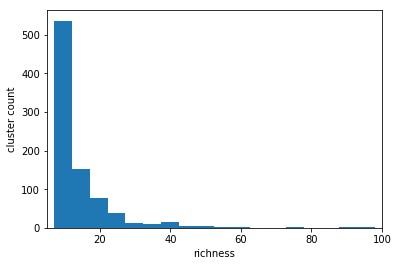

In [18]:
if mode == 'full':
    cl_ra, cl_dec, cl_lam = lim(cl_ra, cl_dec, cl_z, rarange, decrange, chirange, lam=True, lamdas=cl_lam)
    cm_ra, cm_dec = lim(cm_ra, cm_dec, cm_z, rarange, decrange, chirange)
    rm_ra, rm_dec = lim(rm_ra, rm_dec, rm_z, rarange, decrange, chirange)
plt.hist(cl_lam, bins=20)
plt.xlabel("richness")
plt.ylabel("cluster count")
plt.xlim(5, 100)

/opt/anaconda/3-5.3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


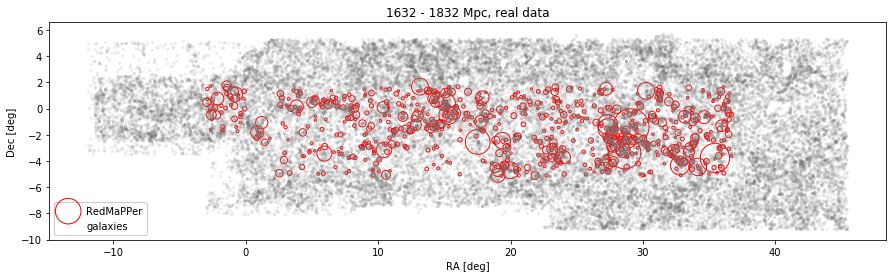

In [19]:
plt.figure(figsize=[15,4])

cl_ra  = coord.Angle(cl_ra*u.degree)
cl_ra  = cl_ra.wrap_at(180*u.degree)
cl_dec = coord.Angle(cl_dec*u.degree)

if mode == 'full':
    rm_ra  = coord.Angle(rm_ra*u.degree)
    rm_ra  = rm_ra.wrap_at(180*u.degree)
    rm_dec = coord.Angle(rm_dec*u.degree)

    cm_ra  = coord.Angle(cm_ra*u.degree)
    cm_ra  = cm_ra.wrap_at(180*u.degree)
    cm_dec = coord.Angle(cm_dec*u.degree)

if mode == 'reduced':
    gal_ra  = coord.Angle(gal_ra*u.degree)
    gal_ra  = gal_ra.wrap_at(180*u.degree)
    gal_dec = coord.Angle(gal_dec*u.degree)
    
ax = plt.subplot()
if mode == 'full':
    ax.scatter(cm_ra, cm_dec, s=30, color='orange', marker='*', label='CMASS', alpha=.7)
    ax.scatter(rm_ra, rm_dec, s=5, color='blue', label='RedMaGiC', alpha=.3)

ax.scatter(cl_ra,cl_dec,s=(cl_lam/3.)**2,color='red', facecolor='none', label='RedMaPPer')
if mode == 'reduced':
    ax.scatter(gal_ra, gal_dec, s=5, color='gray', label='galaxies', alpha = .1)
# ax.set_xlim([0,8])
# ax.set_ylim([-4,4])
plt.legend(facecolor='white', framealpha=1)
plt.title("{:d} - {:d} Mpc, real data".format(chirange[0], chirange[1]))
plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
# plt.savefig("/home/mlokken/actxdes_stacking/plots/real_data_gals_and_cls_200Mpc_zpt3_5x5deg.png", dpi=300)
plt.show()

## Buzzard

In [20]:
cl_lam_b, cl_z, cl_ra ,cl_dec = get_fullinfo("/mnt/scratch-lustre/mlokken/buzzard/clusters_to_stack/buzzard_1.9.9_3y3a_rsshift_run_redmapper_v0.5.1_lgt05_vl02/fullinfo_lambda_7_to_200_distMpc_{:d}_{:d}.txt".format(dlow, dhigh))
gal_t, gal_p = get_theta_phi("/mnt/scratch-lustre/mlokken/buzzard/objects_for_number_density_map/thetaphi_distMpc_{:d}_{:d}.txt".format(dlow, dhigh))
gal_ra, gal_dec = theta_phi_to_ra_dec(gal_t,gal_p)


/opt/anaconda/3-5.3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


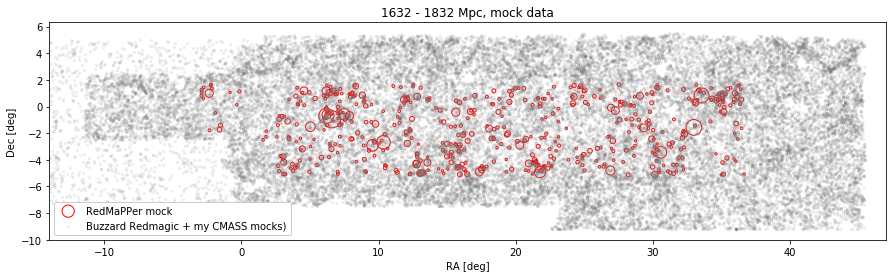

In [21]:
plt.figure(figsize=[15,4])

cl_ra  = coord.Angle(cl_ra*u.degree)
cl_ra_b  = cl_ra.wrap_at(180*u.degree)
cl_dec_b = coord.Angle(cl_dec*u.degree)

if mode == 'full':
    rm_ra  = coord.Angle(rm_ra*u.degree)
    rm_ra  = rm_ra.wrap_at(180*u.degree)
    rm_dec = coord.Angle(rm_dec*u.degree)

    cm_ra  = coord.Angle(cm_ra*u.degree)
    cm_ra  = cm_ra.wrap_at(180*u.degree)
    cm_dec = coord.Angle(cm_dec*u.degree)

if mode == 'reduced':
    gal_ra  = coord.Angle(gal_ra*u.degree)
    gal_ra  = gal_ra.wrap_at(180*u.degree)
    gal_dec = coord.Angle(gal_dec*u.degree)
    
ax = plt.subplot()
if mode == 'full':
    ax.scatter(cm_ra, cm_dec, s=30, color='orange', marker='*', label='CMASS', alpha=.7)
    ax.scatter(rm_ra, rm_dec, s=5, color='blue', label='RedMaGiC', alpha=.3)

ax.scatter(cl_ra_b,cl_dec_b,s=(cl_lam_b/3.)**2,color='red', facecolor='none', label='RedMaPPer mock')
if mode == 'reduced':
    ax.scatter(gal_ra, gal_dec, s=5, color='gray', label='Buzzard Redmagic + my CMASS mocks)', alpha = .1)
ax.set_xlim([-14,47])
# ax.set_ylim([-4,4])
plt.legend(facecolor='white', framealpha=1)
plt.title("{:d} - {:d} Mpc, mock data".format(chirange[0], chirange[1]))
plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
# plt.savefig("/home/mlokken/actxdes_stacking/plots/real_data_gals_and_cls_200Mpc_zpt3_5x5deg.png", dpi=300)
plt.show()

In [27]:
# Compare the abundance-matched halos with Buzzard redmapper mocks
abmatched = np.loadtxt("/mnt/scratch-lustre/mlokken/buzzard/clusters_to_stack/abundance_matched/fullinfo_lambda_7_to_200_distMpc_{:d}_{:d}.txt".format(dlow, dhigh))
x = abmatched[:,1]; y = abmatched[:,2]; z = abmatched[:,3]; M = abmatched[:,0]
cl_ra, cl_dec = xyz_to_ra_dec(x,y,z)
redshift = []
chi = np.sqrt(x**2+y**2+z**2)
for c in chi:
    redshift.append(z_at_value(cosmo.comoving_distance, c*u.Mpc))
redshift = np.asarray(redshift)


In [28]:
lambda_0 = 40.
z_0 = 0.35
F_lambda = 1.356
G_z = -0.3
M_0 =  3.081 * 10**14 # in units of M_sun  

richness = (((M/M_0)*((1+z_0)/(1+redshift))**G_z)**(1/F_lambda))*lambda_0


(array([521., 195.,  70.,  30.,  14.,  14.,   2.,   7.,   2.,   4.]),
 array([13.72532207, 19.24550571, 24.76568936, 30.285873  , 35.80605665,
        41.32624029, 46.84642393, 52.36660758, 57.88679122, 63.40697487,
        68.92715851]),
 <a list of 10 Patch objects>)

/opt/anaconda/3-5.3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


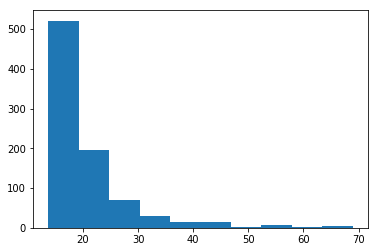

In [29]:
plt.hist(richness)

/opt/anaconda/3-5.3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


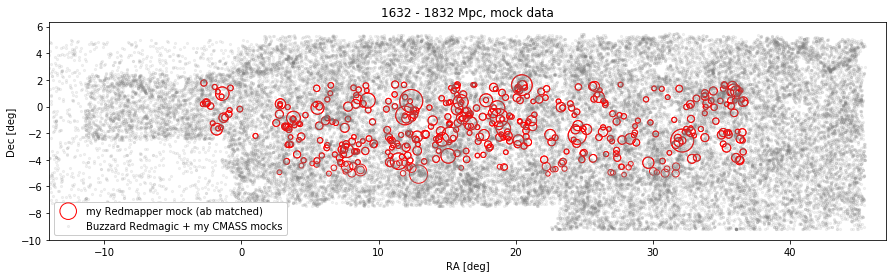

In [30]:
plt.figure(figsize=[15,4])

cl_ra  = coord.Angle(cl_ra*u.degree)
cl_ra_mine  = cl_ra.wrap_at(180*u.degree)
cl_dec_mine = coord.Angle(cl_dec*u.degree)

if mode == 'full':
    rm_ra  = coord.Angle(rm_ra*u.degree)
    rm_ra  = rm_ra.wrap_at(180*u.degree)
    rm_dec = coord.Angle(rm_dec*u.degree)

    cm_ra  = coord.Angle(cm_ra*u.degree)
    cm_ra  = cm_ra.wrap_at(180*u.degree)
    cm_dec = coord.Angle(cm_dec*u.degree)


ax = plt.subplot()
if mode == 'full':
    ax.scatter(cm_ra, cm_dec, s=30, color='orange', marker='*', label='CMASS', alpha=.7)
    ax.scatter(rm_ra, rm_dec, s=5, color='blue', label='RedMaGiC', alpha=.3)

ax.scatter(cl_ra_mine,cl_dec_mine,s=(richness/3.)**2,color='red', facecolor='none', label='my Redmapper mock (ab matched)')
if mode == 'reduced':
    ax.scatter(gal_ra, gal_dec, s=5, color='gray', label='Buzzard Redmagic + my CMASS mocks', alpha = .1)
ax.set_xlim([-14,47])
# ax.set_ylim([-4,4])
plt.legend(facecolor='white', framealpha=1)
plt.title("{:d} - {:d} Mpc, mock data".format(chirange[0], chirange[1]))
plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
# plt.savefig("/home/mlokken/actxdes_stacking/plots/real_data_gals_and_cls_200Mpc_zpt3_5x5deg.png", dpi=300)
plt.show()

/opt/anaconda/3-5.3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


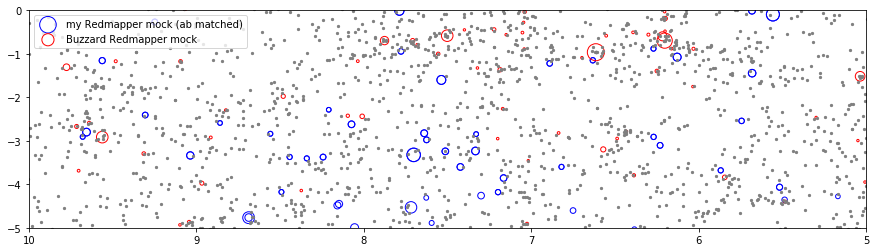

In [31]:
plt.figure(figsize=[15,4])
plt.scatter(cl_ra_mine,cl_dec_mine,s=(richness/3.)**2,color='blue', facecolor='none', label='my Redmapper mock (ab matched)')
plt.scatter(cl_ra_b,cl_dec_b,s=(cl_lam_b/3.)**2,color='red', facecolor='none', label='Buzzard Redmapper mock')
plt.scatter(gal_ra, gal_dec, s=5, color='gray')
plt.legend()
plt.xlim([10,5])
plt.ylim([-5,0])
plt.show()